In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import seaborn as sns
import tensorflow as tf
from keras.utils import to_categorical 
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# 1.0 Import training data

In [2]:
df=pd.read_csv("train.csv")
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
y=df["label"]
x=df.drop("label",axis=1)
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 784 entries, pixel0 to pixel783
dtypes: int64(784)
memory usage: 251.2 MB


 # 2.0 Exploratory Data Analysis

/Users/kennethyap/anaconda3/envs/DataScience/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/kennethyap/anaconda3/envs/DataScience/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/kennethyap/anaconda3/envs/DataScience/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='label', ylabel='count'>

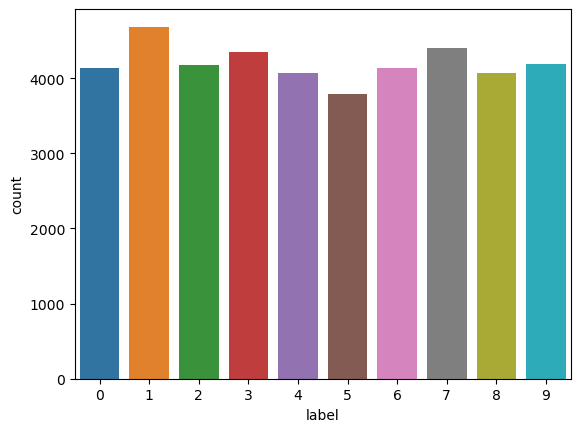

In [4]:
sns.countplot(x=y)


In [5]:
y.value_counts()

label
1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: count, dtype: int64

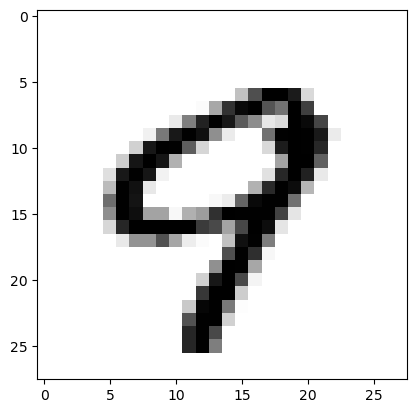

In [6]:
# Visualize data- reshaped to 28 x 28 pixel data format
plt.imshow(x.iloc[100].to_numpy().reshape(28,28),cmap='binary')

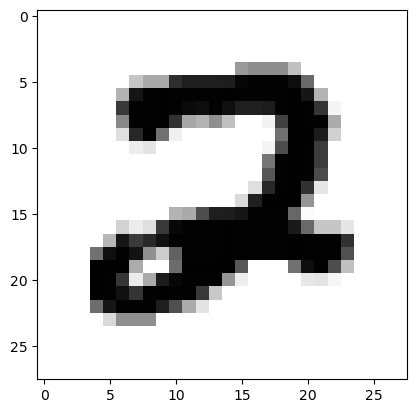

In [7]:
# View random image
some_digit=x.to_numpy()[169]
some_digit=some_digit.reshape(28,28)
plt.imshow(some_digit,cmap="binary")

In [8]:
# Check corresponding label is correct
y[169]

2

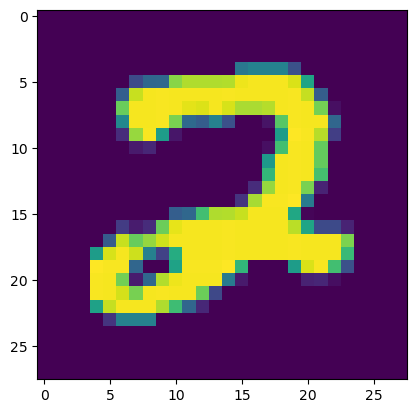

In [9]:
# Another better way to plot the images. Using .values will convert the dataseries into a numpy array
plt.imshow(x.iloc[169].values.reshape(28,28))

In [10]:
# Check if any null values are in the list
x.isnull().sum()
x.isnull().any().describe()

pixel0      0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Length: 784, dtype: int64

count       784
unique        1
top       False
freq        784
dtype: object

 ## 2.1 **Reshaping the Data**

In [11]:
# An image is 28x28 size. 28*28=784; 1 represent the channels in the image.
x=x.values.reshape(-1,28,28,1)
x.shape

(42000, 28, 28, 1)

## 2.2 Normalization

In [12]:
# pixel range is from 0 to 255,hence the number 255- this will scale images to [0,1]
x=x.astype('float32')/255
# converting the labels into Categorical labels - Helps with Softmax Classification
y=tf.keras.utils.to_categorical(y,num_classes=10)
y.shape

(42000, 10)

 ## 2.3 Data Setup for Model

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
#Additional Validation split is not required as validtion split is mentioned during the model.fit in neural networks
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
print(f'The shape of train data {x_train.shape} and test data {x_test.shape}')

The shape of train data (33600, 28, 28, 1) and test data (8400, 28, 28, 1)


# 3.0 Set up Neural Network

In [15]:
# Import libraries needed
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,BatchNormalization,Conv2D,MaxPooling2D,Dropout,Input
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras import regularizers

In [16]:
# a sequential model is a linear stack of layers where you can simply add one layer at a time.
model=Sequential()
# it takes the input data, which is assumed to be a 2D array with dimensions (28, 28), representing an image with 28x28 pixels. The flatten layer converts this 2D array into a 1D array of size 784 (28 * 28).
model.add(Flatten(input_shape=(28,28)))
# applied to normalize the activations of the previous layer at each batch during training. It can accelerate training and improve the stability of the neural network.
model.add(BatchNormalization())
# adds a fully connected (dense) layer with 784 neurons and a rectified linear unit (ReLU) activation function. The ReLU activation introduces non-linearity to the model.
model.add(Dense(784,activation="relu"))
# Normalize previous layer again
model.add(BatchNormalization())
# applied with a dropout rate of 0.5. Dropout helps prevent overfitting by randomly setting a fraction of input units to 0 at each update during training.
model.add(Dropout(0.5))
# fully connected layer with 128 neurons and ReLU activation is added.
model.add(Dense(128,activation="relu"))
# normalize previous layer again
model.add(BatchNormalization())
# final dense layer has 10 neurons (assuming it's used for a classification task with 10 classes) and a softmax activation function. Softmax is often used in the output layer for multi-class classification problems to convert the network's raw output into probability scores for each class.
model.add(Dense(10,activation="softmax"))
#model.add(Dense(784,activation="relu",kernel_regularizer='l2'))

In [17]:
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 batch_normalization (Batch  (None, 784)               3136      
 Normalization)                                                  
                                                                 
 dense (Dense)               (None, 784)               615440    
                                                                 
 batch_normalization_1 (Bat  (None, 784)               3136      
 chNormalization)                                                
                                                                 
 dropout (Dropout)           (None, 784)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               1

In [18]:
# train model
history=model.fit(x_train,y_train,epochs=10,batch_size=100,verbose=2,validation_data=(x_test,y_test),validation_split=0.1)


Epoch 1/10
336/336 - 2s - loss: 0.2944 - accuracy: 0.9100 - val_loss: 0.1374 - val_accuracy: 0.9568 - 2s/epoch - 5ms/step
Epoch 2/10
336/336 - 2s - loss: 0.1405 - accuracy: 0.9575 - val_loss: 0.1079 - val_accuracy: 0.9658 - 2s/epoch - 4ms/step
Epoch 3/10
336/336 - 1s - loss: 0.1027 - accuracy: 0.9679 - val_loss: 0.0959 - val_accuracy: 0.9699 - 1s/epoch - 4ms/step
Epoch 4/10
336/336 - 1s - loss: 0.0852 - accuracy: 0.9732 - val_loss: 0.0915 - val_accuracy: 0.9705 - 1s/epoch - 4ms/step
Epoch 5/10
336/336 - 1s - loss: 0.0725 - accuracy: 0.9767 - val_loss: 0.0815 - val_accuracy: 0.9748 - 1s/epoch - 4ms/step
Epoch 6/10
336/336 - 1s - loss: 0.0622 - accuracy: 0.9793 - val_loss: 0.0842 - val_accuracy: 0.9746 - 1s/epoch - 4ms/step
Epoch 7/10
336/336 - 1s - loss: 0.0529 - accuracy: 0.9828 - val_loss: 0.0785 - val_accuracy: 0.9757 - 1s/epoch - 4ms/step
Epoch 8/10
336/336 - 2s - loss: 0.0493 - accuracy: 0.9834 - val_loss: 0.0793 - val_accuracy: 0.9748 - 2s/epoch - 5ms/step
Epoch 9/10
336/336 - 2s 

 Model Evaluation

In [19]:
# Conduct fit
predictions=model.predict(x_test)
predictions.shape

263/263 [==============================] - 0s 718us/step


(8400, 10)

In [20]:
# Compare against input shape
y_test.shape

(8400, 10)

In [21]:
# model.summary()
model.evaluate(x_test,y_test)

263/263 [==============================] - 0s 771us/step - loss: 0.0835 - accuracy: 0.9758


[0.08346206694841385, 0.9758333563804626]

In [22]:
#the output of model.evaluate gives out a tuple: loss, metric specified in model.compile
scores = model.evaluate(x_test,y_test, verbose=0)
scores

[0.08346206694841385, 0.9758333563804626]

<Axes: >

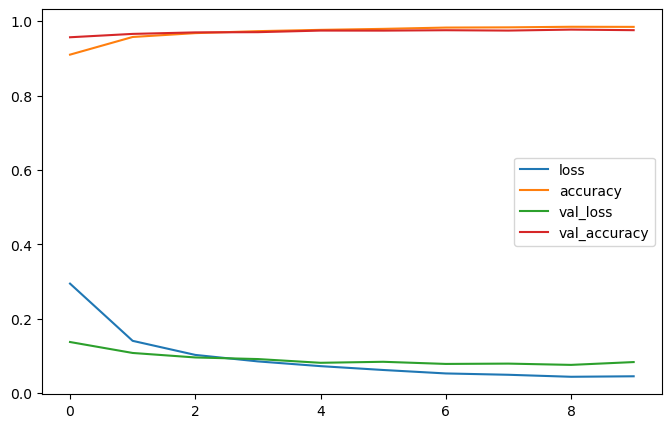

In [23]:
# Plot figure to visualize
pd.DataFrame(history.history).plot(figsize=(8, 5))

# 4.0 Building a Convolutional Neural Network

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,BatchNormalization,Conv2D,MaxPooling2D,Dropout,Input
from tensorflow.keras.layers import Flatten

In [25]:
model2=Sequential()

In [26]:
#Simple model without learning rate scheduler
model2.add(Input(shape=(28, 28, 1)))

model2.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.25))

model2.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.25))

model2.add(Flatten())

model2.add(Dense(256, activation='relu'))
model2.add(BatchNormalization())
model2.add(Dropout(0.5))

model2.add(Dense(10, activation='softmax'))

In [27]:
model2.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])
print(model2.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 batch_normalization_3 (Bat  (None, 26, 26, 32)        128       
 chNormalization)                                                
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 dropout_1 (Dropout)         (None, 13, 13, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 batch_normalization_4 (Bat  (None, 11, 11, 64)       

In [37]:
# more sophisticated mdoel with learning rate scheduler

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras import backend as K

# Learning rate scheduler function
def lr_scheduler(epoch, lr):
    return lr * 0.9 if epoch % 10 == 0 else lr

model2 = Sequential()

model2.add(Input(shape=(28, 28, 1)))

model2.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'))
model2.add(BatchNormalization())
model2.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.25))

model2.add(Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'))
model2.add(BatchNormalization())
model2.add(Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.25))

model2.add(Flatten())

model2.add(Dense(256, activation='relu'))
model2.add(BatchNormalization())
model2.add(Dropout(0.5))

model2.add(Dense(10, activation='softmax'))

# Compile the model with an initial learning rate and the learning rate scheduler
initial_learning_rate = 0.001
model2.compile(loss='categorical_crossentropy',
               optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=initial_learning_rate),
               metrics=['accuracy'])

# Attach the learning rate scheduler callback
lr_scheduler_callback = LearningRateScheduler(lr_scheduler)

In [38]:
history2=model2.fit(x_train,y_train,epochs=10,batch_size=100,verbose=2,validation_split=0.1)

Epoch 1/10
303/303 - 65s - loss: 0.1883 - accuracy: 0.9433 - val_loss: 3.9150 - val_accuracy: 0.2062 - 65s/epoch - 216ms/step
Epoch 2/10
303/303 - 70s - loss: 0.0669 - accuracy: 0.9790 - val_loss: 0.0513 - val_accuracy: 0.9848 - 70s/epoch - 231ms/step
Epoch 3/10
303/303 - 72s - loss: 0.0467 - accuracy: 0.9863 - val_loss: 0.0368 - val_accuracy: 0.9899 - 72s/epoch - 238ms/step
Epoch 4/10
303/303 - 73s - loss: 0.0410 - accuracy: 0.9865 - val_loss: 0.0428 - val_accuracy: 0.9875 - 73s/epoch - 241ms/step
Epoch 5/10
303/303 - 76s - loss: 0.0330 - accuracy: 0.9897 - val_loss: 0.0347 - val_accuracy: 0.9896 - 76s/epoch - 252ms/step
Epoch 6/10
303/303 - 76s - loss: 0.0292 - accuracy: 0.9910 - val_loss: 0.0370 - val_accuracy: 0.9890 - 76s/epoch - 251ms/step
Epoch 7/10
303/303 - 76s - loss: 0.0240 - accuracy: 0.9923 - val_loss: 0.0321 - val_accuracy: 0.9908 - 76s/epoch - 251ms/step
Epoch 8/10
303/303 - 75s - loss: 0.0251 - accuracy: 0.9914 - val_loss: 0.0368 - val_accuracy: 0.9896 - 75s/epoch - 249

<Axes: >

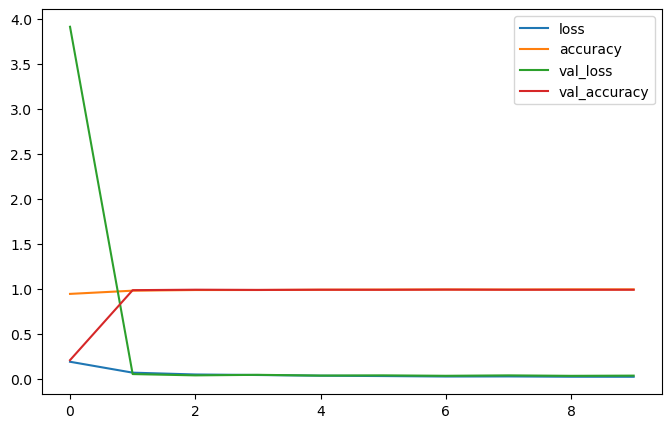

In [39]:
pd.DataFrame(history2.history).plot(figsize=(8, 5))

In [40]:
cnn_predict=model2.predict(x_test)
model2.evaluate(x_test,y_test)

263/263 [==============================] - 6s 23ms/step - loss: 0.0295 - accuracy: 0.9911


[0.029475722461938858, 0.9910714030265808]

# 5.0 **Test Prediction**

In [41]:
# clean input data
test_data=pd.read_csv("test.csv")
test_x=test_data/255
test_x=test_x.values.reshape(-1,28,28,1)

In [42]:
# predict with trained model - the CNN model produced better results
new_predict=model2.predict(test_x)
new_predict1=np.argmax(new_predict,axis=1)

875/875 [==============================] - 21s 24ms/step


In [43]:
# export results
results = pd.Series(new_predict1,name="Label")
submission=pd.concat([pd.Series(range(1,28001),name = "ImageId"),results],axis = 1)
submission.to_csv("submission.csv",index=False)